In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')

In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
X = dataset.iloc[:, 3:5].values

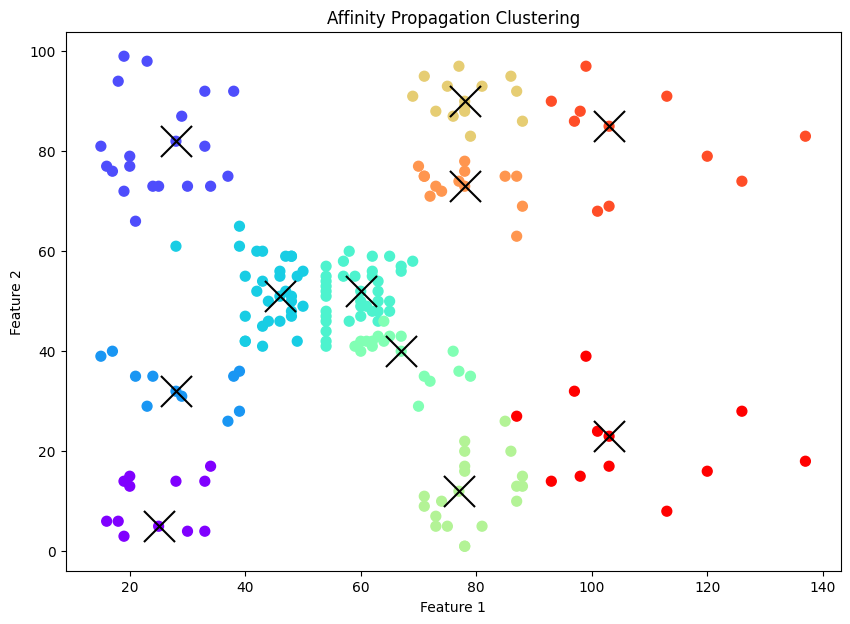

In [5]:
import sklearn
from sklearn.cluster import AffinityPropagation
clustering = AffinityPropagation(random_state=5)
re=clustering.fit(X)
labels = clustering.labels_

plt.figure(figsize=(10, 7))
plt.scatter( X[:, 0],X[:, 1], c=labels, cmap='rainbow', s=50)
plt.scatter(clustering.cluster_centers_[:, 0], clustering.cluster_centers_[:, 1], 
            color='black', marker='x', s=500, label='Centers')
plt.title('Affinity Propagation Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [6]:
supervised=dataset

In [7]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [13]:
labels

array([ 2,  1,  0,  1,  2,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  2,
        1,  2,  1,  2,  1,  0,  1,  0,  1,  2,  3,  2,  1,  0,  1,  0,  1,
        0,  1,  0,  1,  2,  1,  2,  1,  2,  3,  2,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  5,  4,  5,  5,  4,  4,  4,  5,  4,  5,  4,
        4,  4,  4,  5,  4,  4,  5,  4,  4,  4,  5,  5,  4,  4,  5,  4,  5,
        4,  4,  5,  4,  7,  5,  8,  5,  7,  6,  8,  6,  8,  5,  8,  6,  7,
        6,  8,  6,  8,  6,  7,  5,  7,  6,  7,  5,  8,  6,  7,  6,  7,  6,
        8,  6,  7,  6,  8,  6,  8,  5,  7,  6,  7,  6,  8,  6,  7, 10,  8,
        6,  8,  6,  7,  6,  7,  6,  8, 10,  9, 10,  9, 10,  9, 10,  9, 10,
        9, 10,  9, 10,  9, 10,  9, 10,  9, 10,  9, 10,  9])

In [10]:
supervised['Cluster_group']=labels

In [11]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,2
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,1
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,9
196,197,Female,45,126,28,10
197,198,Male,32,126,74,9
198,199,Male,32,137,18,10


In [14]:
supervised.to_csv("cluster.csv",index=False)

In [17]:
y_pred=re.predict(X)

In [19]:
from sklearn.metrics import silhouette_score
silhouette_avg=silhouette_score(X,y_pred) 

In [20]:
silhouette_avg

0.4317941560811469

In [21]:
import pickle
filename="finalized_model_affinity_propagation.sav"

In [22]:
pickle.dump(re,open(filename,'wb'))

In [25]:
loaded_model=pickle.load(open("finalized_model_affinity_propagation.sav",'rb'))
result=loaded_model.predict([[120,79]])

In [26]:
result

array([9])